In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AnalysisCSVfiles/'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# Fiducial cuts

last edit June-22, 2021 (EOC, mbp)

data files from:

/cache/clas12/rg-b/production/recon/spring2019/torus-1/pass1/v0/dst/train/sidisdvcs/sidisdvcs_*.hipo

requirements in "SIDISc12rSkimmer.C"

In [47]:
# events = pd.read_csv(main_data_path + "events_011265" + ".csv")
events = pd.read_csv(main_data_path + "events_006420" + ".csv")

In [50]:
# use a sample of events to develop plots
events = events[1:int(1e5)]

In [51]:
events['SamplingFraction'] = (events.e_E_PCAL + events.e_E_ECIN + events.e_E_ECOUT)/events.Pe

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# 1. Electron Fiducial cuts
## 1.1 Fiducial Cuts for the PCAL

In [52]:
def add_WV_lines(ax=None, ylim=None ):
    for line in [9,14,19]:
        ax.plot( [line,line], ylim, 'r-' , linewidth=1 )

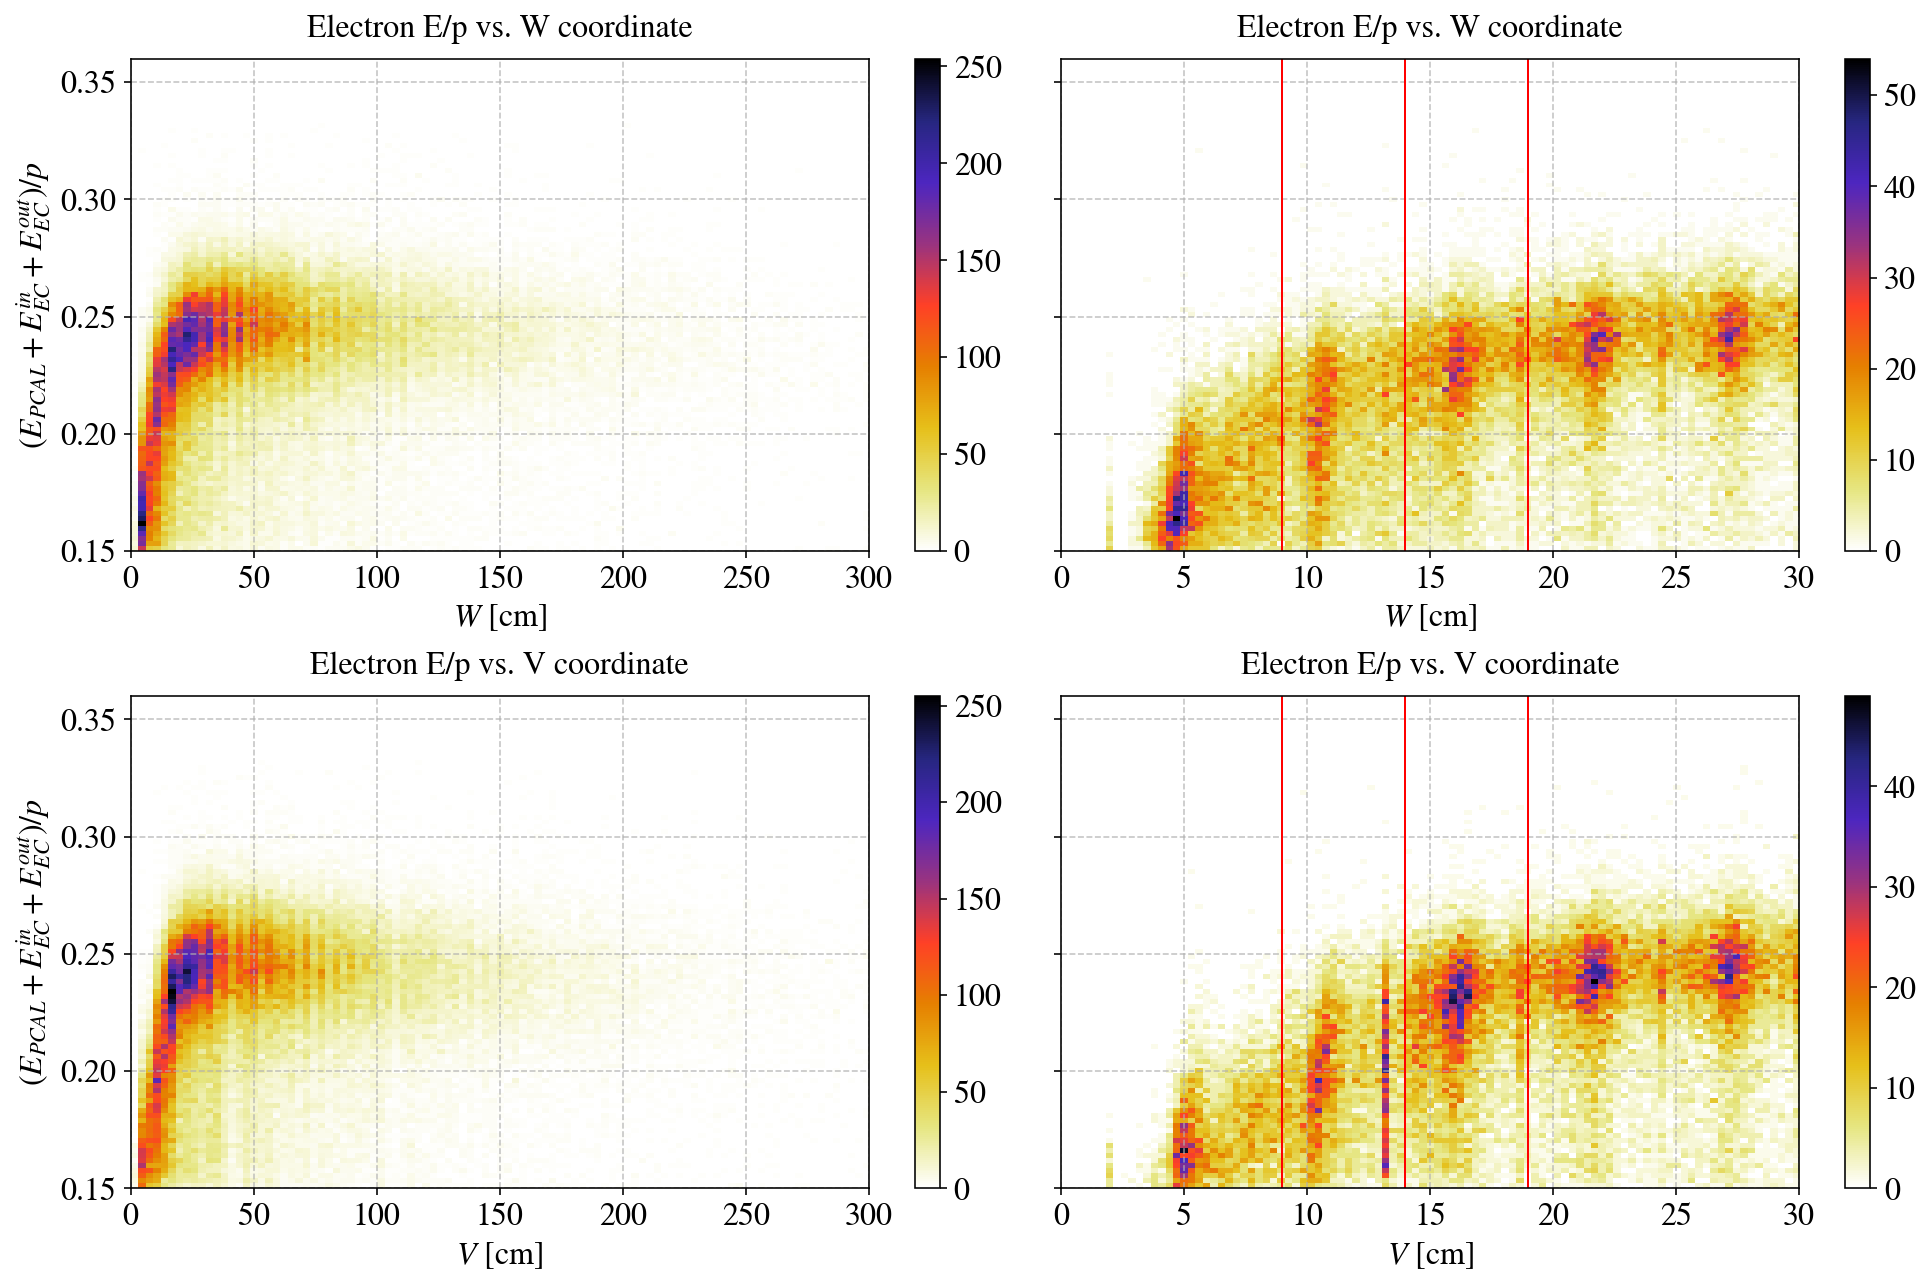

In [53]:
ylim = (0.15,0.36)
yticks=(0.15,0.2,0.25,0.3,0.35)
xlimZoom = (0,30)
Nbins = 100
binsLarge = (np.linspace(0,300,Nbins),np.linspace(0.15,0.36,Nbins))
binsZoom = (np.linspace(0,30,Nbins),np.linspace(0.15,0.36,Nbins))

fig = plt.figure(figsize=(14,9))

ax = fig.add_subplot(2,2,1)
# scatter_plot_with_kernel( events.e_PCAL_W, events.SamplingFraction, s=5 )
h=ax.hist2d( events.e_PCAL_W, events.SamplingFraction , bins=binsLarge, cmap='CMRmap_r' )
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
set_axes(ax,'$W$ [cm]','$(E_{PCAL}+E_{EC}^{in}+E_{EC}^{out})/p$',ylim=ylim,yticks=yticks,
         title='Electron E/p vs. W coordinate',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(2,2,2)
# scatter_plot_with_kernel( events.e_PCAL_W, events.SamplingFraction, s=5 )
h=ax.hist2d( events.e_PCAL_W, events.SamplingFraction , bins=binsZoom, cmap='CMRmap_r' )
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
add_WV_lines(ax,ylim)
set_axes(ax,'$W$ [cm]','',xlim=xlimZoom,ylim=ylim,yticks=yticks,remove_ticks_y=True,
         title='Electron E/p vs. W coordinate',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(2,2,3)
# scatter_plot_with_kernel( events.e_PCAL_V, events.SamplingFraction, s=5 )
h=ax.hist2d( events.e_PCAL_V, events.SamplingFraction , bins=binsLarge, cmap='CMRmap_r' )
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
set_axes(ax,'$V$ [cm]','$(E_{PCAL}+E_{EC}^{in}+E_{EC}^{out})/p$',ylim=ylim,yticks=yticks,
         title='Electron E/p vs. V coordinate',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(2,2,4)
# scatter_plot_with_kernel( events.e_PCAL_V, events.SamplingFraction, s=5 )
h=ax.hist2d(events.e_PCAL_V, events.SamplingFraction, bins=binsZoom, cmap='CMRmap_r' )
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
add_WV_lines(ax,ylim)
set_axes(ax,'$V$ [cm]','',xlim=xlimZoom,ylim=ylim,yticks=yticks,remove_ticks_y=True,
         title='Electron E/p vs. V coordinate',fontsize=16,do_add_grid=True);

plt.tight_layout()

In [54]:
events_fiducial = events[   (np.abs(events.e_PCAL_x)>0)
                          & (np.abs(events.e_PCAL_y)>0) 
                          & (events.e_PCAL_W>19) 
                          & (events.e_PCAL_V>19) ]

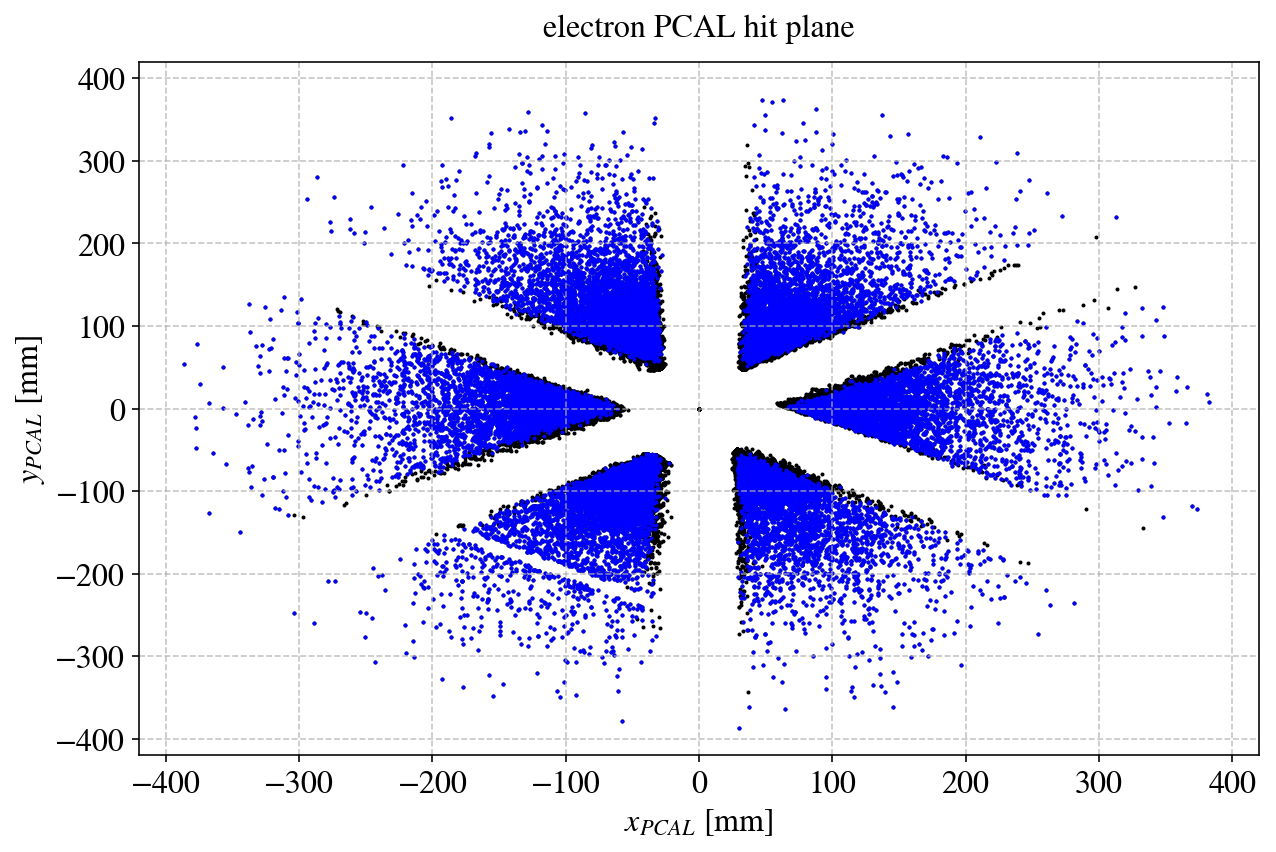

In [55]:
xlim=(-420,420)
ylim=(-420,420)
bins = (np.linspace(np.min(xlim),np.max(xlim),100),np.linspace(np.min(ylim),np.max(ylim),100))

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(events.e_PCAL_x, events.e_PCAL_y, s=1, color='k')
# scatter_plot_with_kernel(events_fiducial.e_PCAL_x, events_fiducial.e_PCAL_y, s=1, do_add_colorbar=True)
# plt.hist2d( events_fiducial.e_PCAL_x, events_fiducial.e_PCAL_y, bins=bins, cmap='CMRmap_r' )
ax.scatter(events_fiducial.e_PCAL_x, events_fiducial.e_PCAL_y, s=1, color='b')
set_axes(ax,'$x_{PCAL}$ [mm]','$y_{PCAL}$ [mm]',
         title='electron PCAL hit plane',
         fontsize=16,do_add_grid=True, 
         xlim=xlim,ylim=ylim);
plt.tight_layout()

## 1.2 Fiducial Cuts for the DC

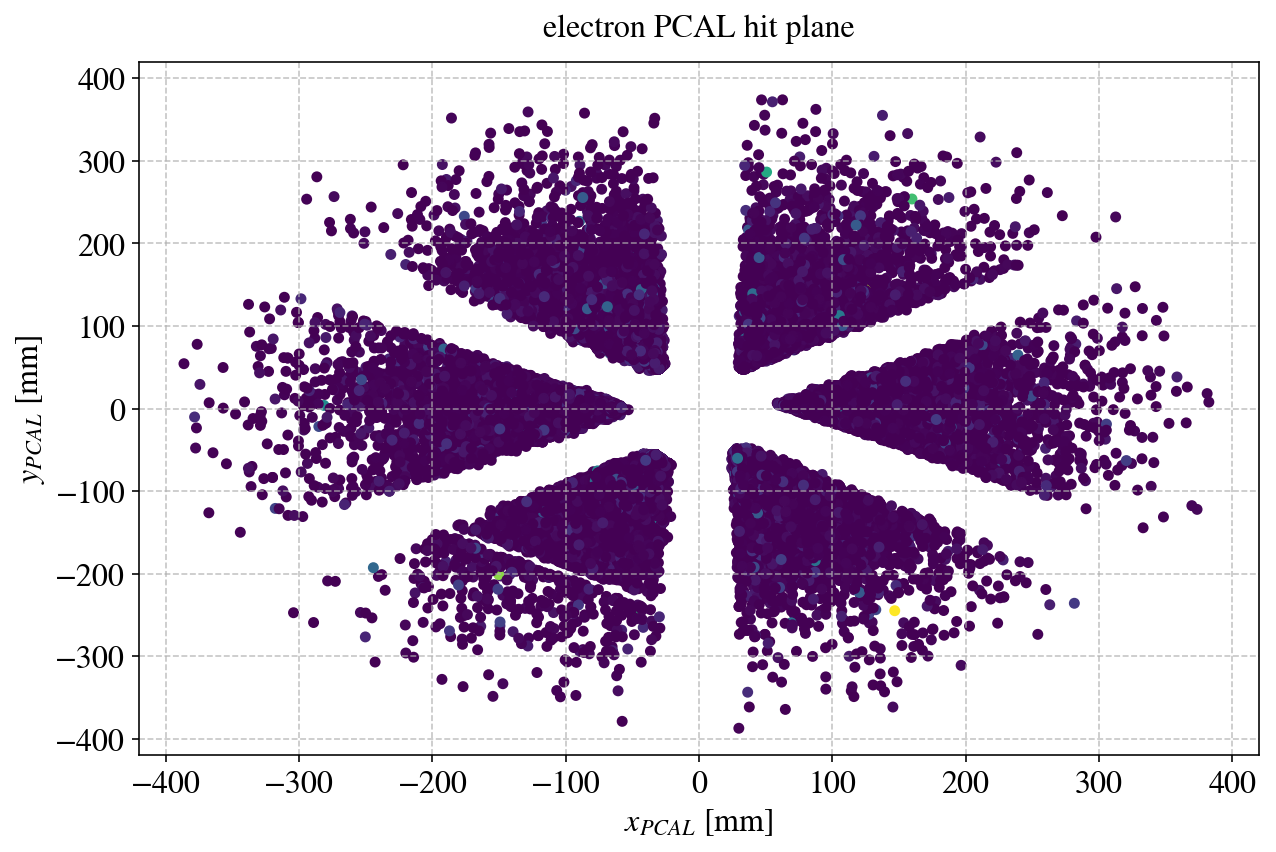

In [56]:
xlim=(-420,420)
ylim=(-420,420)
bins = (np.linspace(np.min(xlim),np.max(xlim),100),np.linspace(np.min(ylim),np.max(ylim),100))
events2plot = events[(np.abs(events.e_PCAL_x)>0) & (np.abs(events.e_PCAL_y)>0)]


fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(events2plot.e_PCAL_x, events2plot.e_PCAL_y, c=events2plot.e_DC_Chi2N, s=20)
set_axes(ax,'$x_{PCAL}$ [mm]','$y_{PCAL}$ [mm]',
         title='electron PCAL hit plane',
         fontsize=16,do_add_grid=True, 
         xlim=xlim,ylim=ylim);
plt.tight_layout()

# 2. Electron Identification Refinement
## 2.1 PCAL Minimum Energy Deposition Cut
cut at 0.07 GeV is used to rejects most of the $\pi^-$

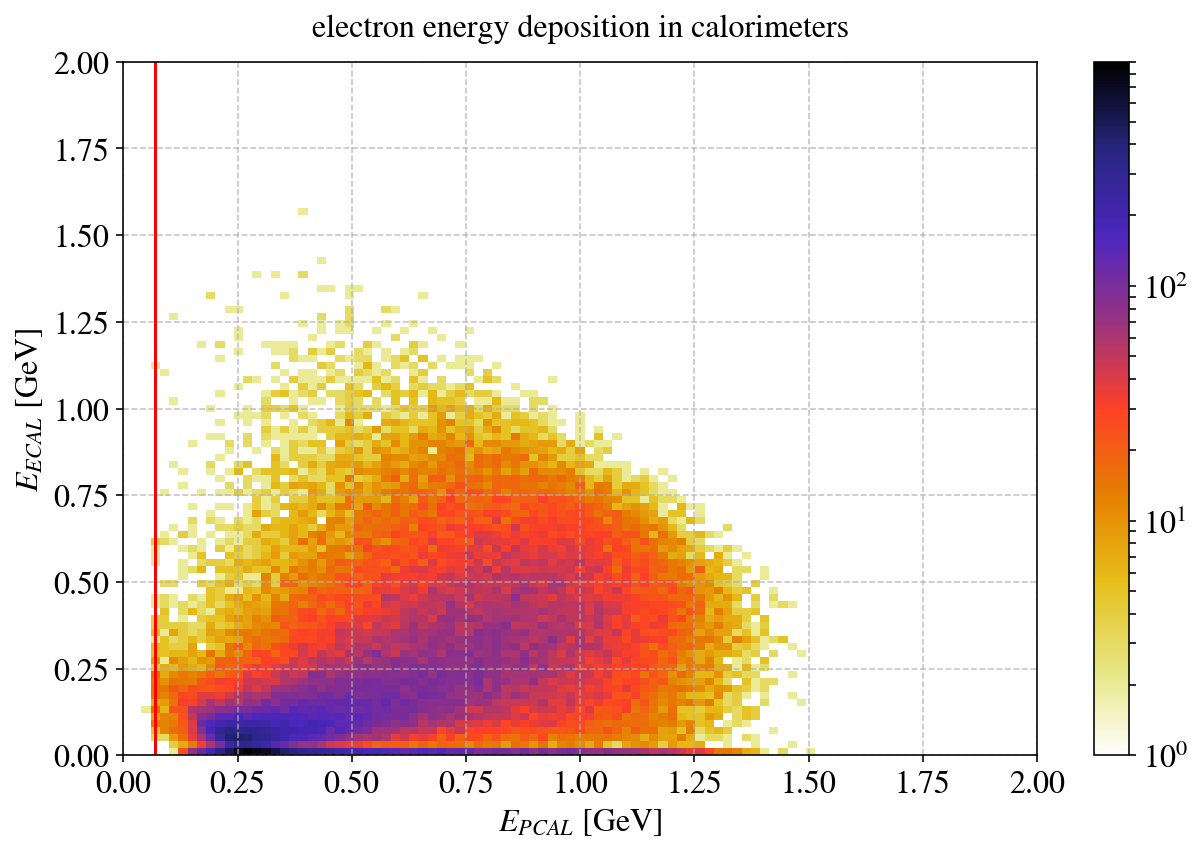

In [57]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
# scatter_plot_with_kernel( events.e_E_PCAL, events.e_E_ECIN + events.e_E_ECOUT, s=1, do_add_colorbar=True)
h=ax.hist2d( events.e_E_PCAL, events.e_E_ECIN + events.e_E_ECOUT, 
          bins=(np.linspace(0,2,100),np.linspace(0,2,100)),norm=mpl.colors.LogNorm(),
          cmap='CMRmap_r')
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
set_axes(ax,'$E_{PCAL}$ [GeV]','$E_{ECAL}$ [GeV]',
         title='electron energy deposition in calorimeters',fontsize=16,do_add_grid=True);
plt.plot([0.07,0.07],[0,2],'-r')
plt.tight_layout()

## 2.2 Sampling Fraction Cut

First, apply a hard cut that represents the ±5σ region from the event-builder particle ID which used for the event selection in the inclusive eX train



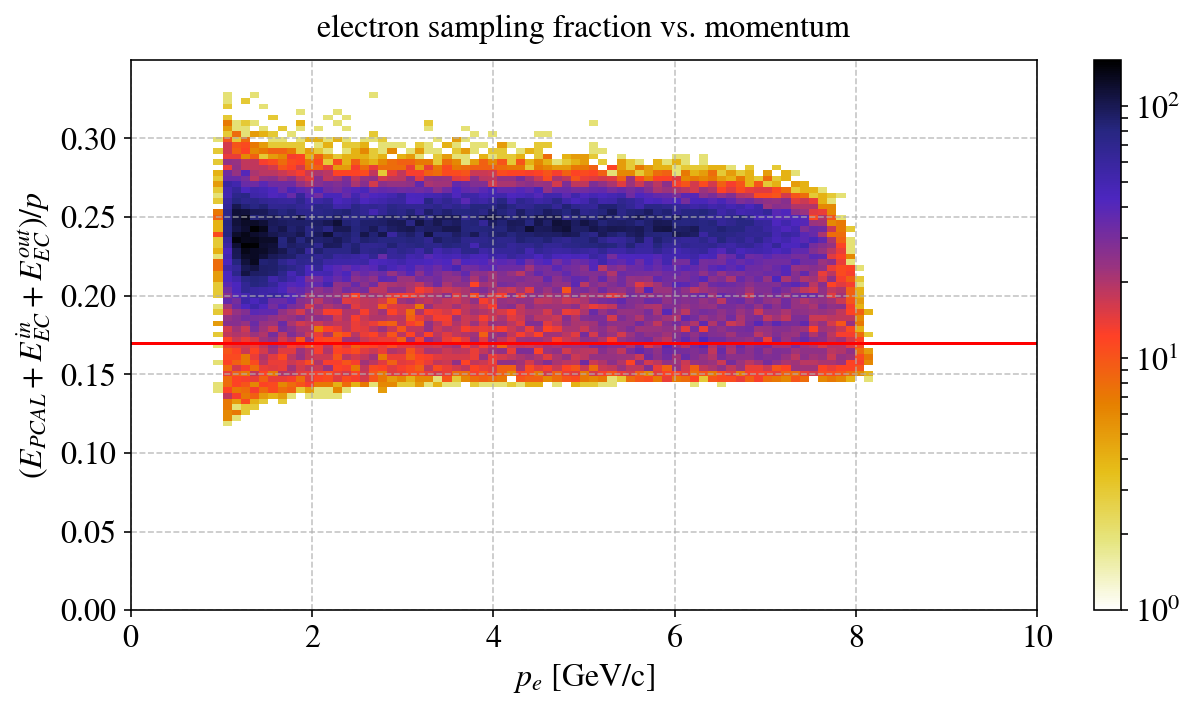

In [58]:
fig = plt.figure(figsize=(9,5))
# for sector in 
ax = fig.add_subplot(1,1,1)
# scatter_plot_with_kernel( events.Pe, events.SamplingFraction, s=1, do_add_colorbar=True)
h=ax.hist2d( events.Pe, events.SamplingFraction, 
            bins=(np.linspace(0,10,100),np.linspace(0.,0.35,100)),
            norm=mpl.colors.LogNorm(),cmap='CMRmap_r')
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
set_axes(ax,'$p_e$ [GeV/c]','$(E_{PCAL}+E_{EC}^{in}+E_{EC}^{out})/p$',
         title='electron sampling fraction vs. momentum',
         xticks=(0,2,4,6,8,10),yticks=(0,0.05,0.1,0.15,0.2,0.25,0.3),
         fontsize=16,do_add_grid=True);
plt.plot([0.,10],[0.17,0.17],'-r')
plt.tight_layout()

Detailed studies showed, that a diagonal cut on
$$ \frac{E_{inner}}{p} < 0.2 - \frac{E_{PCAL}}{p}$$
can remove most of the remaining pion contamination above the HTCC threshold.

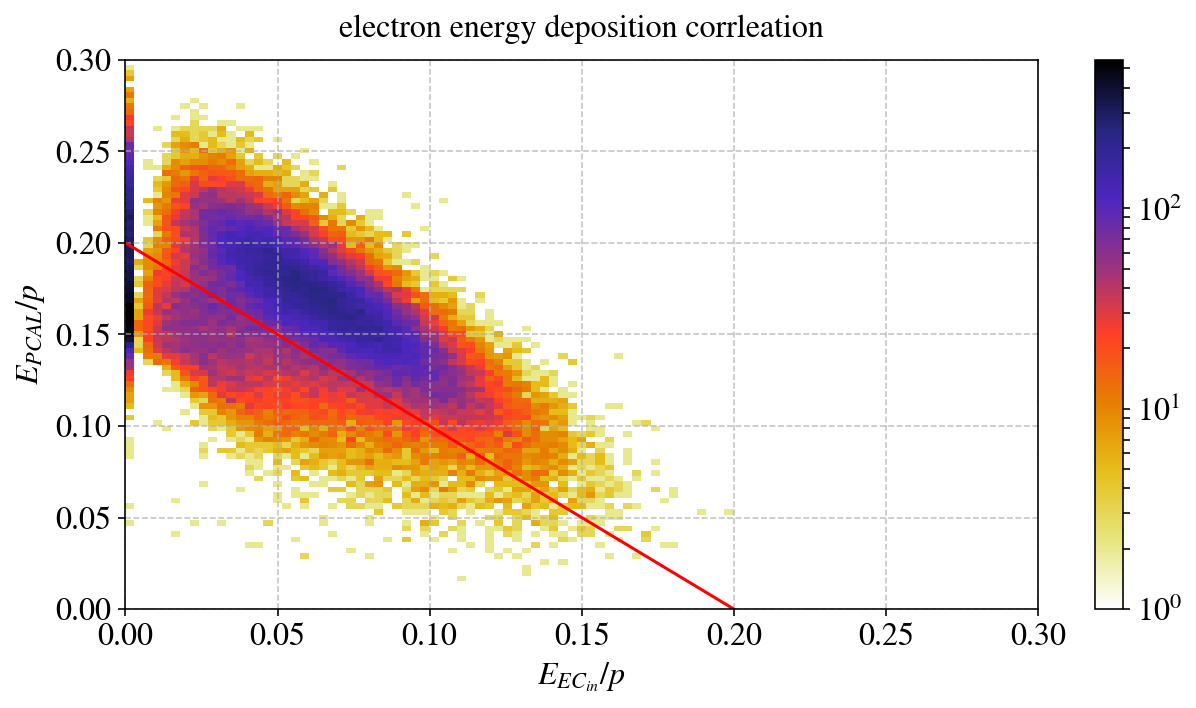

In [59]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1,1,1)
# scatter_plot_with_kernel( events.e_E_ECIN/events.Pe, events.e_E_PCAL/events.Pe, s=1, do_add_colorbar=True)
h=ax.hist2d( events.e_E_ECIN/events.Pe, events.e_E_PCAL/events.Pe, 
            bins=(np.linspace(0,0.3,100),np.linspace(0.,0.3,100)),
            norm=mpl.colors.LogNorm(),cmap='CMRmap_r')
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
set_axes(ax,'$E_{EC_{in}}/p$','$E_{PCAL}/p$',
         title='electron energy deposition corrleation',
         xticks=(0,0.05,0.1,0.15,0.2,0.25,0.3),yticks=(0,0.05,0.1,0.15,0.2,0.25,0.3),
         fontsize=16,do_add_grid=True);
plt.plot([0.,0.2],[0.2,0],'-r')
plt.tight_layout()

## 2.3 Cut on z-vertex position

The cut for the in-bending torus field is set to: -13.0 cm < vz < +12.0 cm. 
(In our case - data from Spring 2019 and Spring 2020)

The cut for the out-bending torus field is set to: -18.0 cm < vz < +10.0 cm.
(In our case - data from Fall 2019)

What is the case for our dataset?

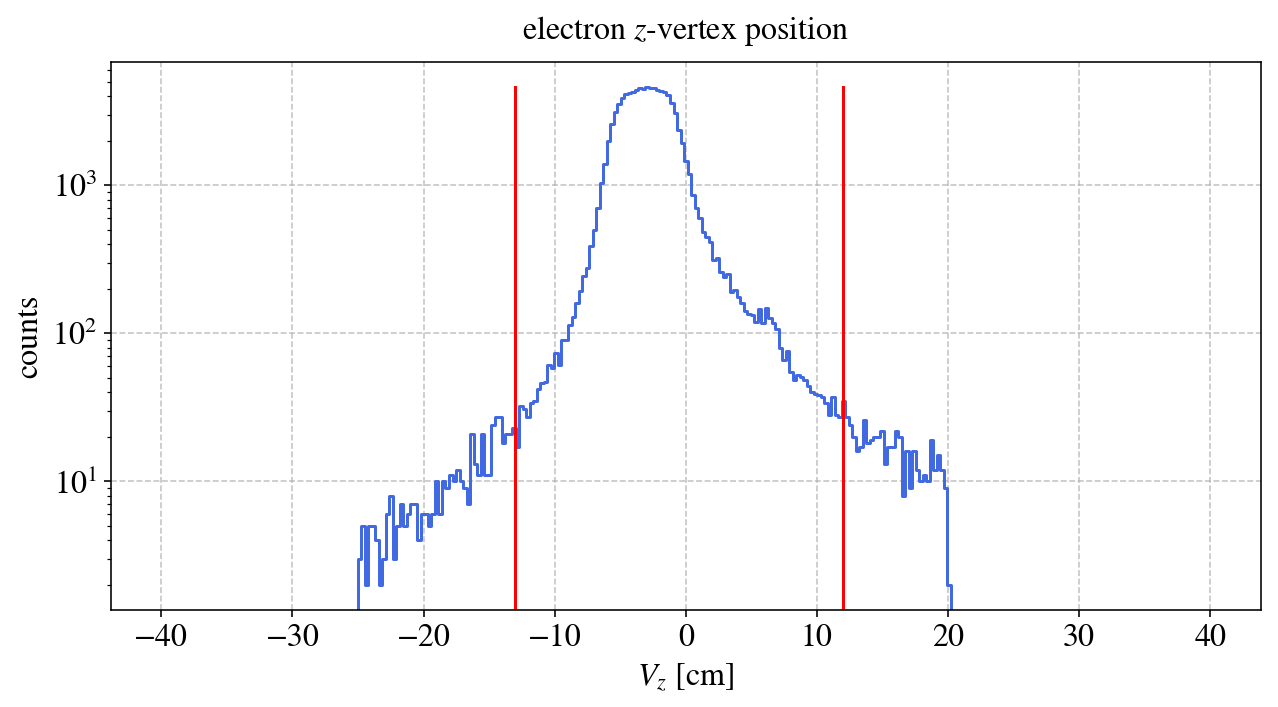

In [60]:
Vz_e_bins = np.linspace(-40,40,300)
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1,1,1)
hist,edges = np.histogram(events.Vz_e,bins=Vz_e_bins)
Vz = (edges[1:]+edges[:-1])/2
ax.step( Vz, hist, color='royalblue', where='mid')
ax.plot([-13,-13],[0,np.max(hist)],'-r',[12,12],[0,np.max(hist)],'-r')
set_axes(ax,'$V_z$ [cm]','counts',title='electron $z$-vertex position',fontsize=16,do_add_grid=True);
ax.set_yscale('log')
plt.tight_layout()

# 3. Hadron Identification Refinement

## 3.1 Cut on the Vertex Difference Between Electrons and Hadrons
$$|v_z (e) - v_z (hadron)| < 20 \; cm$$

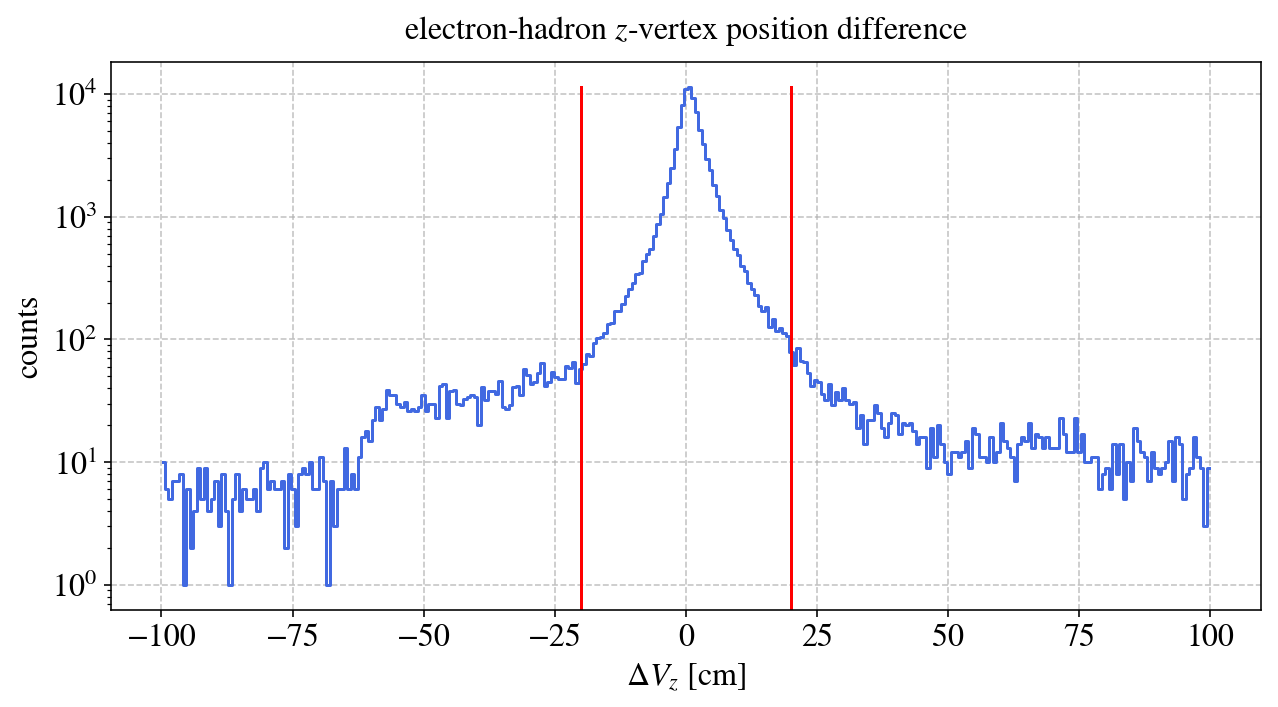

In [61]:
dVz_bins = np.linspace(-100,100,300)
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1,1,1)
hist,edges = np.histogram( events.Vz_e - events.Vz_pips ,bins=dVz_bins)
dVz = (edges[1:]+edges[:-1])/2
ax.step( dVz, hist, color='royalblue', where='mid')
ax.plot([-20,-20],[0,np.max(hist)],'-r',[20,20],[0,np.max(hist)],'-r')
set_axes(ax,'$\Delta V_z$ [cm]','counts',title='electron-hadron $z$-vertex position difference',fontsize=16,do_add_grid=True);
ax.set_yscale('log')
plt.tight_layout()

## 3.2 Cut on chi2PID from the Event Builder
In the ideal case, the chi2pid distribution should have a σ of 1

for $\pi^+$ C = 0.88,
the lower bound is
$$ \chi^2_{PID} > - C \cdot 3$$

and the upper bound is divided:
for $p < 2.44$ GeV
$$ \chi^2_{PID} < C \cdot 3$$
for 2.44 < p < 4.6 GeV
$$ \chi^2_{PID} < C \cdot (0.00869 + 14.98587 \cdot e^{−p/1.18236} + 1.81751 e^{-p/4.86394})$$
for 4.6 GeV < p 
$$ \chi^2_{PID} < C \cdot (-1.14099 + 24.14992 e^{−p/1.36554} + 2.66876 e^{-p/6.80552})$$

In [62]:
def pips_chi2PID_lowerBound(p, C=0.88):
    return -C * 3 * np.ones(len(p))

def pips_chi2PID_upperBound(p, C=0.88):
    ub = []
    for i in range(len(p)):
        if p[i]<2.44:
            ub.append( C*3 )
        elif p[i]<4.6:
            ub.append( C*(0.00869 + 14.98587*np.exp(-p[i]/1.18236)+1.81751*np.exp(-p[i]/4.86394)) ) 
        else:
            ub.append( C*(-1.14099 + 24.14992*np.exp(-p[i]/1.36554) + 2.66876*np.exp(-p[i]/6.80552)))
    return np.array(ub)

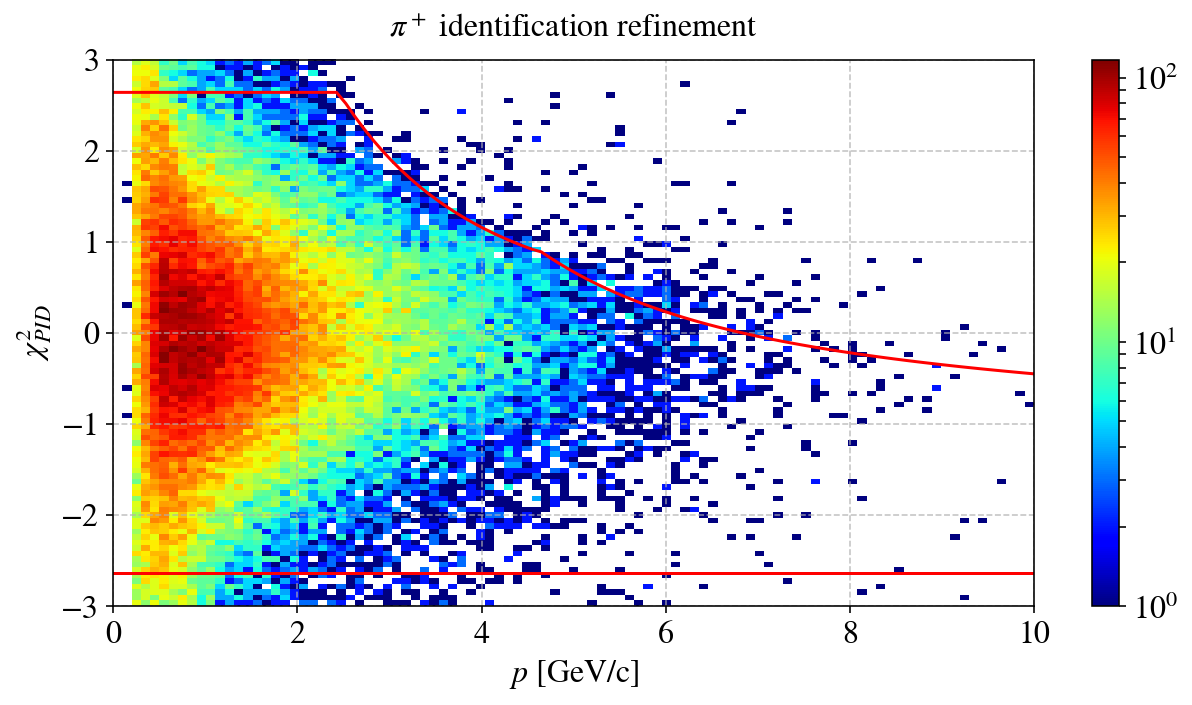

In [63]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1,1,1)

h=ax.hist2d( events.Ppips, events.pips_chi2PID, 
            bins=(np.linspace(0,10,100),np.linspace(-3,3,100)),
            norm=mpl.colors.LogNorm(),cmap='jet')
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)


p = np.linspace(0,10,100)
ax.plot(p,pips_chi2PID_lowerBound(p),'-r')
ax.plot(p,pips_chi2PID_upperBound(p),'-r')

set_axes(ax,'$p$ [GeV/c]','$\chi^2_{PID}$',
         title='$\pi^+$ identification refinement',fontsize=16,do_add_grid=True);
plt.tight_layout()

## arxiv

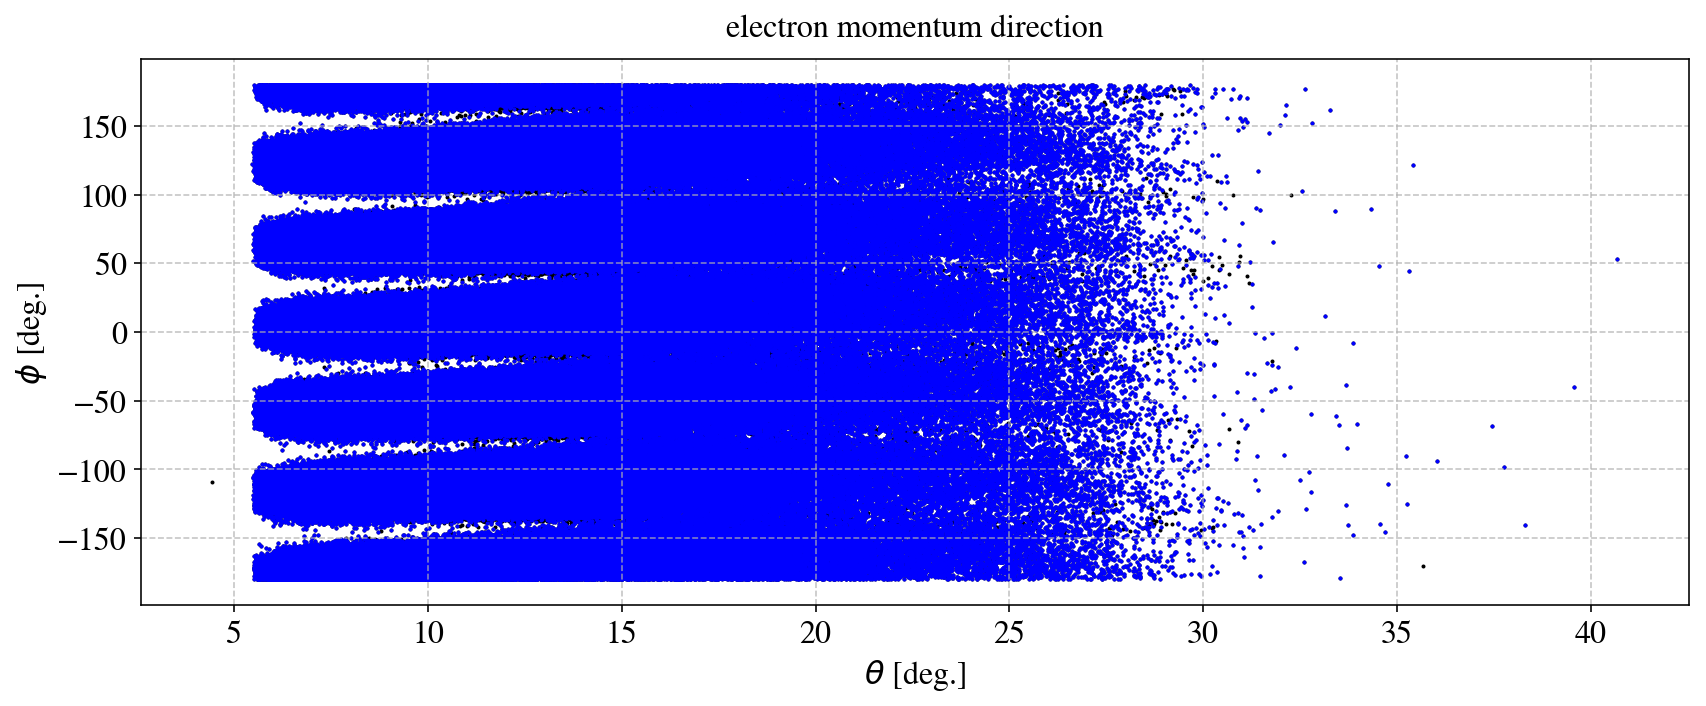

In [74]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
# scatter_plot_with_kernel(events.Pe_x, events.Pe_y, s=1, do_add_colorbar=True)
ax.scatter(events.Ptheta_e*180./np.pi, events.Pphi_e*180./np.pi, s=1, color='k')
ax.scatter(events_fiducial.Ptheta_e*180./np.pi, events_fiducial.Pphi_e*180./np.pi, s=1, color='blue')
set_axes(ax,'$\\theta$ [deg.]','$\\phi$ [deg.]',title='electron momentum direction',fontsize=16,do_add_grid=True);
plt.tight_layout()

In [116]:
def get_phi_limits(sector_idx, region_idx, theta):
    ''' 
    phi_max,phi_min = get_phi_limits(sector_idx, boundary_idx, theta):

    return:
    minimum and maximum phi limits for a given (electron) theta
    
    from Florian' clas12fiducial::InitFiducialFunctions()
    TString fiducial_functions[2] = {"[0] - exp([1]*x+[2])", "[0] + exp([1]*x+[2])"};
    TString boundary[2] = {"upper","lower"};
    double maxPhi = fiducialFunction[0][sector]->Eval(theta);
    double minPhi = fiducialFunction[1][sector]->Eval(theta);     
    '''

    sector = lower_momentum_fit[lower_momentum_fit.sector==sector_idx]
    boundary = sector[sector['DC-region']==region_idx]
    p0 = np.double(boundary.p0)
    p1 = np.double(boundary.p1)
    p2 = np.double(boundary.p2)
    phi_max, phi_min = (p0 - np.exp(p1*theta + p2)),(p0 + np.exp(p1*theta + p2))
    return phi_max, phi_min

In [ ]:
c12fid_lookup = '/Users/erezcohen/Desktop/Software/CLAS12/bandsoft_tools/clas12fiducial/';
lower_momentum_fit = pd.read_csv(c12fid_lookup + 'lower_momentum_fit.dat',delimiter='\t',
                                 names=['sector','DC-region','p0','p1','p2'])
upper_momentum_fit = pd.read_csv(c12fid_lookup + 'upper_momentum_fit.dat',delimiter='\t',
                                 names=['sector','DC-region','p0','p1','p2'])
lower_momentum_fit

# plot theta/phi fiducial limits:
theta = np.linspace(0,40,30)

fig=plt.figure(figsize=(12,7))
for sector_idx in range(1,2):
    ax = fig.add_subplot(1,1,sector_idx)
    for region_idx,region_color in zip(range(1),['k','r','b']):
        phi_max,phi_min = get_phi_limits(sector_idx=sector_idx, region_idx=region_idx, theta=theta)
        plt.plot( theta , phi_min , '-', color=region_color )
        plt.plot( theta , phi_max+180 , '--', color=region_color )
    set_axes(ax,x_label='$\\theta$ [deg.]',y_label='$\\phi$ [deg.]',title='sector %d'%sector_idx,do_add_grid=True,ylim=(-180,180));

# phiget_phi_limit(sector_idx=2,boundary_idx=0,'min',theta=theta)
# limit(sector_idx=2,boundary_idx=1,theta=theta)
# limit(sector_idx=2,boundary_idx=2,theta=theta)
plt.tight_layout()